In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from sklearn.cluster import KMeans

In [3]:
k = int(input("Please Enter the number of colors You want to keep : "))
name = input("Please Enter your name : ")

Please Enter the number of colors You want to keep : 12
Please Enter your name : Rahul


## Image Capturing and Saving

In [5]:
cam = cv2.VideoCapture(0)

text = "Press SPACE to take Snapshot, ESC to exit. Latest Pic will be used..... So don't worry :p"

cv2.namedWindow(text)

datafolder = "./Img_Data/"

img_name = name+".jpeg"

while True:
    
    ret, frame = cam.read()
    cv2.imshow(text, frame)
    
    if not ret:
        break
        
    key = cv2.waitKey(15)

    if key%256 == 27:               # ESC pressed
        
        print("ESC hit, Saving and closing !!")
        
        if(len(img_name)!= 0):
            cv2.imwrite(datafolder+img_name, frame)
            
        break
        
        
    elif key%256 == 32:               # SPACE pressed
       
        img_name = "{}.jpeg".format(name)
        print("Clicked")
        

cam.release()

cv2.destroyAllWindows()

Clicked
Clicked
Clicked
Clicked
ESC hit, Saving and closing !!


In [6]:
img = cv2.imread(datafolder+img_name)

In [7]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # Converting from BGR to RGB

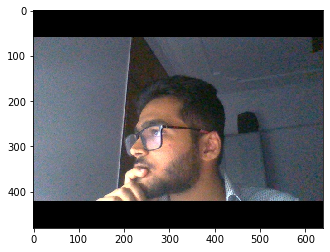

In [8]:
pltImg = img/255

plt.imshow(pltImg)                              # Image Plotting

## Implementing KMeans++ Algorithm

Here, the sklearn KMeans++ cluster creator is used instead of the regular KMeans algorithm 

In [9]:
pixels = np.reshape(img,(-1,3))


km = KMeans(n_clusters=k)
km.fit(pixels)                                     # Training

centers = km.cluster_centers_.astype("uint8")      # Color value in each channel ranges from 0-255 

new_img = np.zeros((pixels.shape))

labels = km.labels_

## Plotting Color Swatches

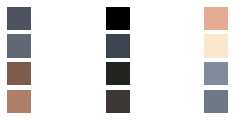

In [10]:
i = 1

plt.figure(figsize=(5,5))                  # 5X5 swatches are printed

for color in centers:
    
    plt.subplot(10, 3, i)
    i+=1
    plt.axis("off")
    
    a = np.zeros((100,100, 3), dtype="uint8")
    a[:, :, :] = color
    plt.imshow(a)
    
plt.show()


#  12 swatches obtained

## Creating New image with extracted colors

In [11]:
for i in range(pixels.shape[0]) :
    new_img[i] = centers[labels[i]]

In [12]:
new_img = np.reshape(new_img,(img.shape))

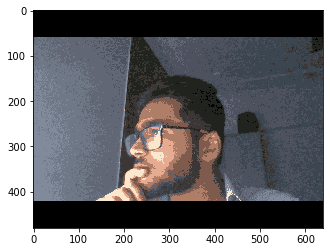

In [13]:
pltImg = new_img/255
plt.imshow(pltImg)

## Saving

In [16]:
new_img_name = name+"_New.jpeg"
cv2.imwrite(datafolder+new_img_name, new_img)

True

## Complete !!!